<a href="https://colab.research.google.com/github/PutraB32/Uas-BDDM/blob/main/EmanuelThomas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
file_path = '/content/heart.csv'
data = pd.read_csv(file_path)
data.head()
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


<ipython-input-3-0775df06d411>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette="viridis")


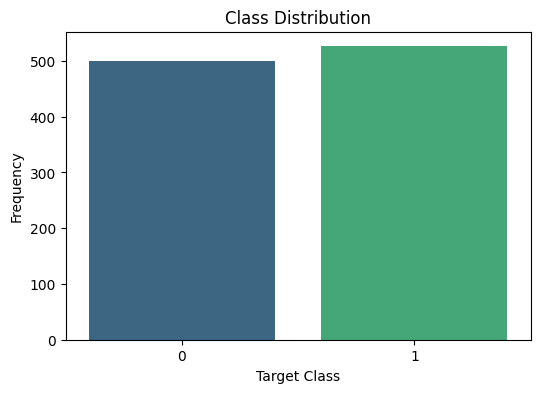

In [ ]:
plt.figure(figsize=(6, 4))
target_counts = data['target'].value_counts()
sns.barplot(x=target_counts.index, y=target_counts.values, palette="viridis")
plt.title('Class Distribution')
plt.xlabel('Target Class')
plt.ylabel('Frequency')
plt.show()

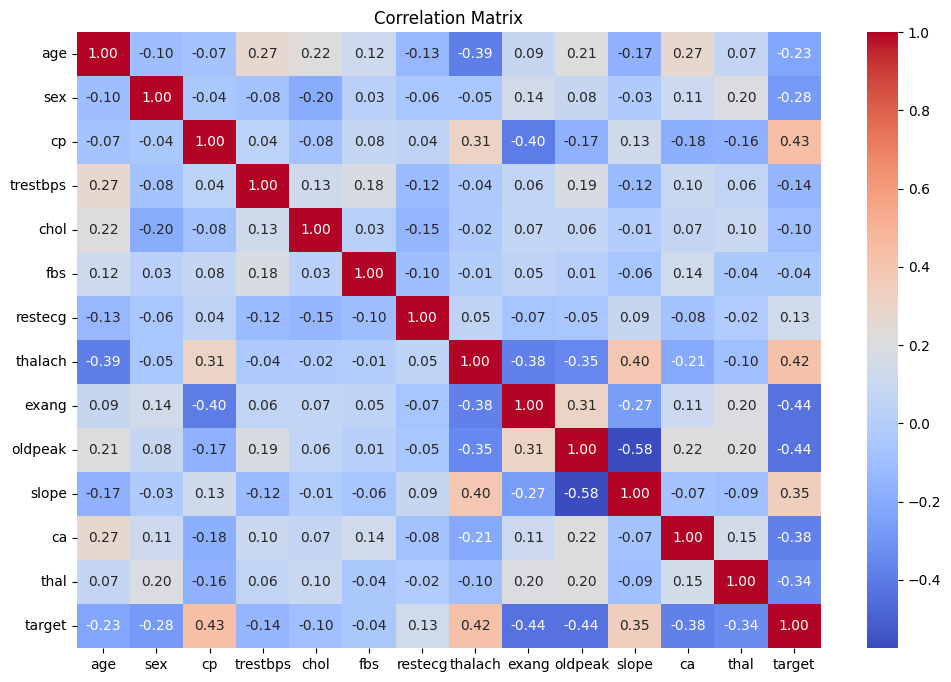

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

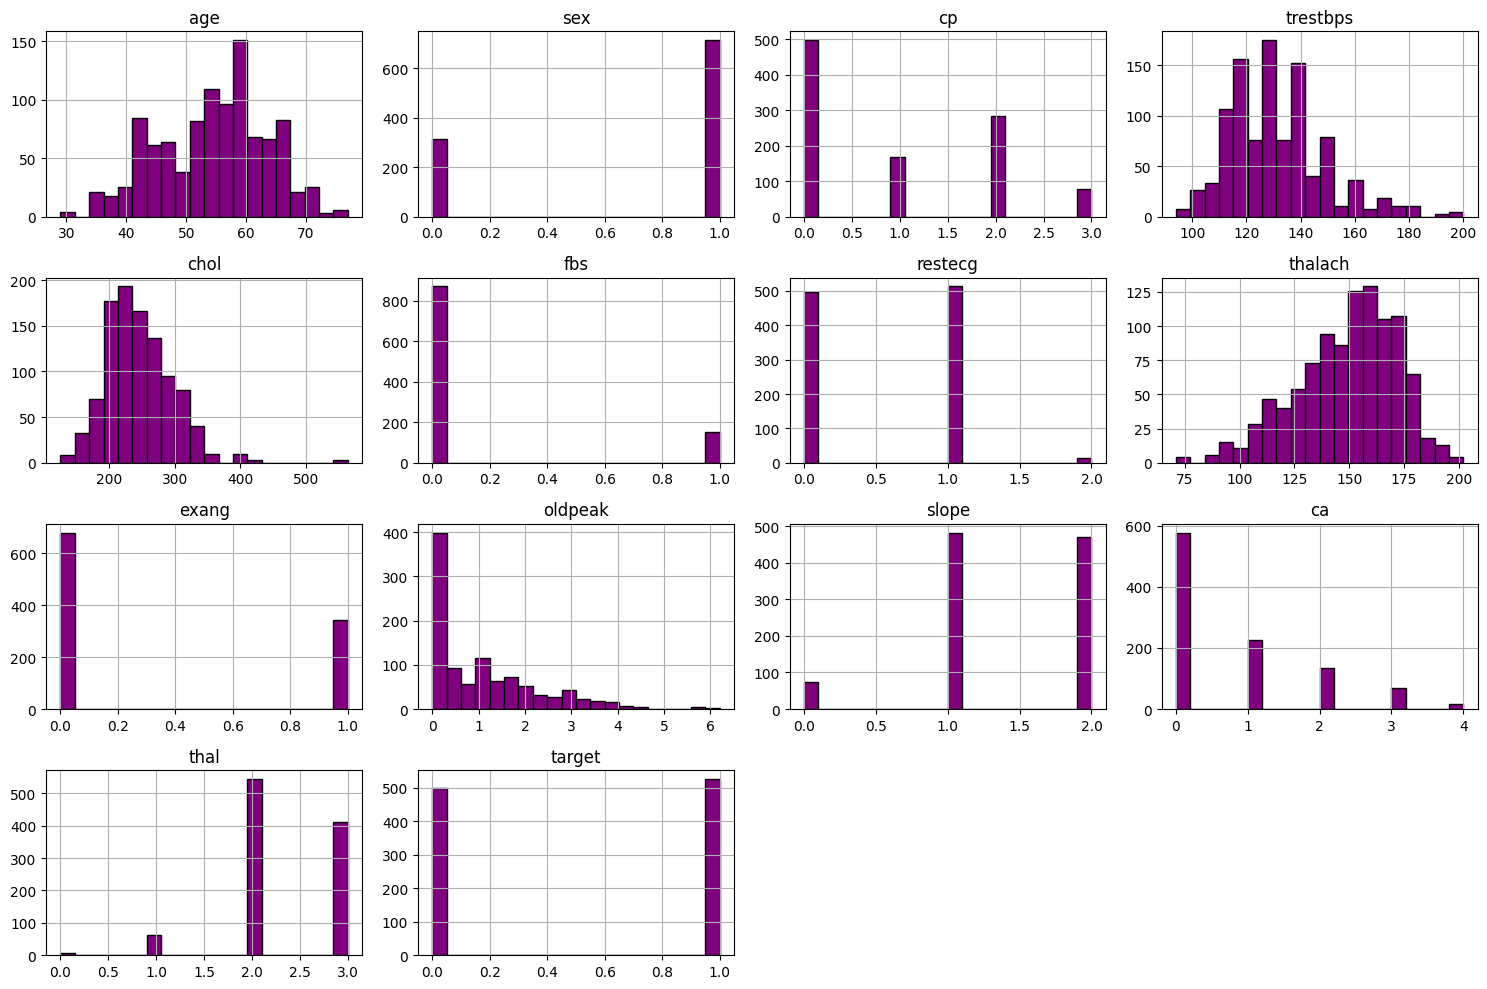

In [ ]:
data.hist(bins=20, figsize=(15, 10), color='purple', edgecolor='black')
plt.tight_layout()
plt.show()

In [ ]:
X = data.drop('target', axis=1)
y = data['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_scaled, y)

Confusion Matrix (K-Fold):
[[389 110]
 [ 45 481]]

Classification Report (K-Fold):
              precision    recall  f1-score   support

           0       0.90      0.78      0.83       499
           1       0.81      0.91      0.86       526

    accuracy                           0.85      1025
   macro avg       0.86      0.85      0.85      1025
weighted avg       0.85      0.85      0.85      1025



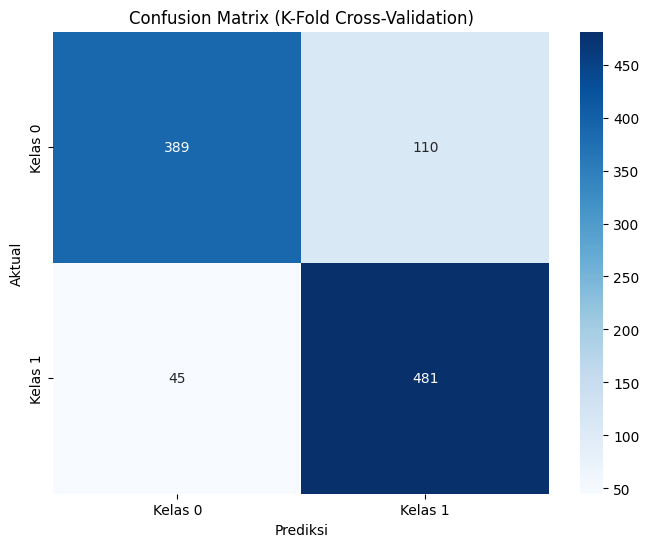

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(SVC(kernel='linear', random_state=42), X_selected, y, cv=skf)

conf_matrix_cv = confusion_matrix(y, y_pred_cv)
report_cv = classification_report(y, y_pred_cv)

print("Confusion Matrix (K-Fold):")
print(conf_matrix_cv)
print("\nClassification Report (K-Fold):")
print(report_cv)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cv, annot=True, fmt="d", cmap="Blues",
             xticklabels=['Kelas 0', 'Kelas 1'],
             yticklabels=['Kelas 0', 'Kelas 1'])
plt.title('Confusion Matrix (K-Fold Cross-Validation)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()


In [ ]:
accuracy = accuracy_score(y, y_pred_cv)
print(f"Akurasi Akhir: {accuracy}")

Akurasi Akhir: 0.848780487804878
